<h1>웹 크롤링</h1>

In [4]:
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import time

import pandas as pd
from selenium.webdriver.common.by import By

In [5]:
def get_data(url):
    #웹 드라이버
    driver = webdriver.Chrome(executable_path='chromedriver')
    driver.implicitly_wait(5)
    driver.get(url)
    while True:
        try:
            더보기 = driver.find_element(By.CSS_SELECTOR,'a.u_cbox_btn_more')
            더보기.click()
            time.sleep(1)
        except:
            break
    print("끝")
    
    contents = driver.find_elements(By.CSS_SELECTOR,'span.u_cbox_contents')
    
    contents = [content.text for content in contents]
    #작성자 추출
    nicks = driver.find_elements(By.CSS_SELECTOR,'span.u_cbox_nick')
    
    nicks = [nick.text for nick in nicks]
    #날짜 추출
    dates = driver.find_elements(By.CSS_SELECTOR,'span.u_cbox_date')
    
    dates = [date.text for date in dates]

    #취합
    data = [data for data in list(zip(nicks,dates, contents))]
    driver.quit()
    return data

In [21]:
if __name__ == '__main__':
    url = "https://news.naver.com/main/read.nhn?m_view=1&includeAllCount=true&mode=LSD&mid=shm&sid1=100&oid=422&aid=0000430957"
    data = get_data(url)
    # print(data)

끝


In [ ]:
data[:5]

[('kwgs****',
  '2020.06.02. 14:18',
  '국회의원 말도 안됩니다.퇴출시켜야 합니다.모든 국민의 생각입니다.민주당은 누구를 대변하는겁니까?'),
 ('clse****', '2020.05.30. 21:09', '난 민주당 찍었지만 윤미향은 퇴출이 맞다고 본다'),
 ('dlar****', '2020.05.30. 21:01', '윤미향 쉴드치는 민주당의원들도 같이 퇴출운동 해야한다.'),
 ('krtt****',
  '2020.05.30. 23:21',
  '기부금과 보조금을 횡령한 도둑년이 국회의원이라다 이게 더불어민주당의 수준이다 국민들은 저런 도둑년을 국회의원으로 뽑은적없다 반드시 퇴출시켜야한다'),
 ('cott****',
  '2020.05.30. 20:26',
  '30년동안 이용해먹다가 ㅡ 빨만큼 빨았으니까ㅡ이제 이용가치가 떨어지니 비례대포국개의원으로? ㅡ 정의연은 해체해라!~ 해 먹을꺼도없잔아? ㅡ 토착왜구라 몰아세우더니ㅡ 왜구의 과자맛은 못있었나 보구나?... 국민들이 나서야합니다. 나서서 윤미향이 사퇴시켜야됩니다~ 이런뇬이 뭔 일을 할까요? ㅡ 뻔하지않습니까? ㅡ 빨대 빠는것만 하겠지요!~')]

In [ ]:
col = ["작성자","날짜","댓글내용"]
data_frame=pd.DataFrame(data,columns=col)
data_frame.to_csv("new_crawling.csv",mode='w',index = False)

<h1>모델학습</h1>

<h1>데이터 평가</h1>

In [6]:
#데이터 불러오기
dataset = pd.read_csv("new_crawling.csv", index_col=0)
test = [test for test in dataset["댓글내용"]]
print("댓글 갯수 : ",len(dataset["댓글내용"]))
# test

댓글 갯수 :  433


In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
MODEL_NAME = "monologg/koelectra-base-finetuned-nsmc"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

In [8]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

In [11]:
# classifier를 통한 긍부정 평가 진행
answer_data = [classifier(answer_data) for answer_data in test]
# answer_data

In [12]:
answer = [data for data in list(zip(test, answer_data))]

In [28]:
#결과 csv파일 만들기.
col = ["댓글 내용","긍부정 평가 결과"]
data_frame=pd.DataFrame(answer,columns=col)
data_frame.to_csv("answer.csv",mode='w',index = False)

<h1>Matplotlib을 활용한 산출 데이터 분석</h1>

In [13]:
answer[:5]

len_positive = 0
len_negative = 0
neg_score = []
pos_score = []
for i in range(0, len(answer)):
    if answer[i][1][0]["label"] == "positive":
        len_positive+=1
        pos_score.append(answer[i][1][0]["score"])
    else:
        len_negative+=1
        neg_score.append(answer[i][1][0]["score"])
print(len_positive, len_negative)



106 327


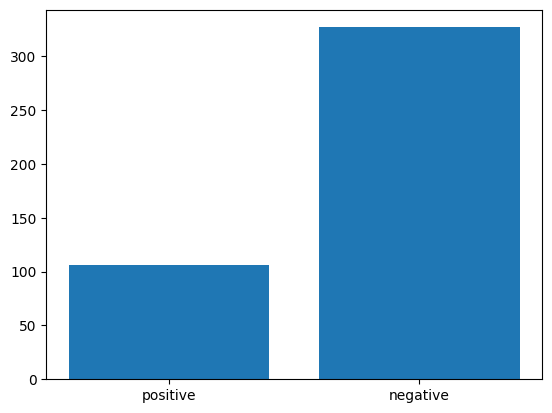

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
name = ['positive', 'negative']
values = [len_positive, len_negative]

plt.bar(x, values)
plt.xticks(x, name)

plt.show()

In [14]:
print(max(neg_score))
print(min(neg_score))
print(max(pos_score))
print(min(pos_score))


0.9989240765571594
0.5028631091117859
0.9990354776382446
0.5374609231948853


In [25]:
pos1 = 0
pos2 = 0
pos3 = 0
pos4 = 0
pos5 = 0

for i in pos_score:
    if i >0.5 and i<=0.6:
        pos1+=1
    if i >0.6 and i<=0.7:
        pos2+=1
    if i >0.7 and i<=0.8:
        pos3+=1
    if i >0.8 and i<=0.9:
        pos4+=1
    if i>0.9 and i<=1:
        pos5+=1
neg1 = 0
neg2 = 0
neg3 = 0
neg4 = 0
neg5 = 0

for i in neg_score:
    if i >0.5 and i<=0.6:
        neg1+=1
    if i >0.6 and i<=0.7:
        neg2+=1
    if i >0.7 and i<=0.8:
        neg3+=1
    if i >0.8 and i<=0.9:
        neg4+=1
    if i>0.9 and i<=1:
        neg5+=1

In [22]:
print(pos1,pos2,pos3,pos4,pos5)
print(pos1+pos2+pos3+pos4+pos5)

11 14 14 18 49
106


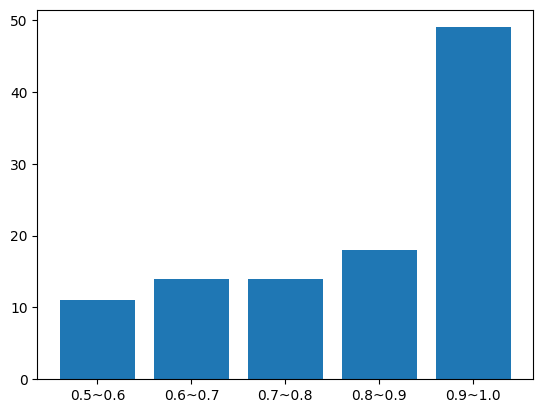

In [23]:
x = np.arange(5)
name = ['0.5~0.6', '0.6~0.7','0.7~0.8','0.8~0.9','0.9~1.0']
values = [pos1,pos2,pos3,pos4,pos5]

plt.bar(x, values)
plt.xticks(x, name)

plt.show()

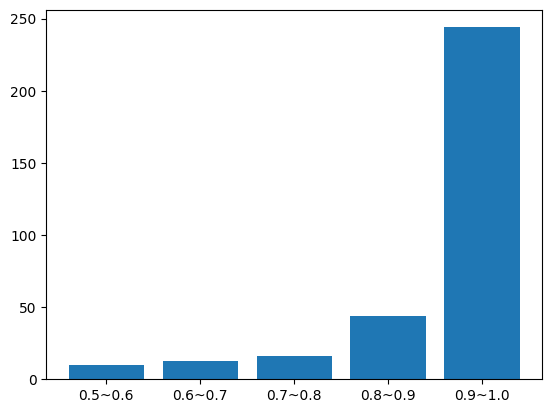

In [26]:
x = np.arange(5)
name = ['0.5~0.6', '0.6~0.7','0.7~0.8','0.8~0.9','0.9~1.0']
values = [neg1,neg2,neg3,neg4,neg5]

plt.bar(x, values)
plt.xticks(x, name)

plt.show()